In [17]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ekoverianto/sentiment-twitter/master/tweets.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1932 entries, 0 to 1931
Data columns (total 4 columns):
ItemID             1932 non-null int64
Sentiment          1932 non-null int64
SentimentSource    1932 non-null object
SentimentText      1932 non-null object
dtypes: int64(2), object(2)
memory usage: 60.5+ KB


In [18]:
df.head()

,ItemID,Sentiment,SentimentSource,SentimentText
0,1038,1,Sentiment140,that film is fantastic #brilliant
1,1804,0,Sentiment140,this music is really bad #myband
2,1693,0,Sentiment140,winter is terrible #thumbs-down
3,1477,0,Sentiment140,this game is awful #nightmare
4,45,1,Sentiment140,I love jam #loveit


In [19]:
import string

df['SentimentText'] = df.SentimentText.map(
    lambda x: x.lower().translate(str.maketrans('','', string.punctuation)))

df.head()

,ItemID,Sentiment,SentimentSource,SentimentText
0,1038,1,Sentiment140,that film is fantastic brilliant
1,1804,0,Sentiment140,this music is really bad myband
2,1693,0,Sentiment140,winter is terrible thumbsdown
3,1477,0,Sentiment140,this game is awful nightmare
4,45,1,Sentiment140,i love jam loveit


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['SentimentText'], 
    df['Sentiment'], 
    random_state = 1
)

print("Training dataset: ", X_train.shape[0])
print("Test dataset: ", X_test.shape[0])

Training dataset:  1449
Test dataset:  483


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(stop_words = 'english')
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [22]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(training_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
pred_train = model.predict(training_data)

In [24]:
(pred_train==y_train).sum()

1430

In [25]:
(pred_train!=y_train).sum()

19

In [26]:
from sklearn.metrics import accuracy_score

print("Accuracy score on training data: ", accuracy_score(y_train, pred_train))

Accuracy score on training data:  0.9868875086266391


In [0]:
pred_test = model.predict(testing_data)

In [28]:
(pred_test==y_test).sum()

475

In [29]:
(pred_test!=y_test).sum()

8

In [30]:
print("Accuracy score on testing data: ", accuracy_score(y_test, pred_test))

Accuracy score on testing data:  0.9834368530020704


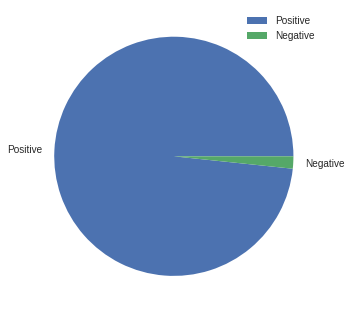

In [31]:
import matplotlib.pyplot as plt

labels = 'Positive', 'Negative'
sizes = [(pred_test==y_test).sum(), (pred_test!=y_test).sum()]

plt.pie(sizes, labels=labels)
plt.legend()
plt.show()

No handles with labels found to put in legend.


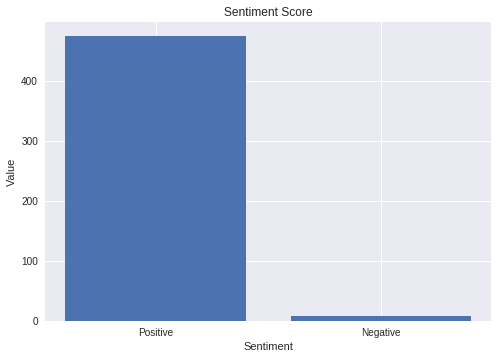

In [32]:
import numpy as np

sizes = [(pred_test==y_test).sum(), (pred_test!=y_test).sum()]
x = np.arange(2)

plt.xlabel('Sentiment')
plt.ylabel('Value')
plt.title('Sentiment Score')
plt.bar(x, sizes)
plt.xticks(x, ('Positive', 'Negative'))
plt.legend()
plt.show()